In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("placement(17).csv")
df.iloc[:,1].max()
df.shape
df.head(3)
df.placed.head(3)

0    1
1    0
2    1
Name: placed, dtype: int64

In [27]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler()

In [31]:
x = df.drop('placed',axis='columns')
y = df['placed']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [51]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [52]:
import tensorflow as tf
from tensorflow import keras

In [56]:
model = keras.Sequential([
    keras.layers.Dense(4,input_shape=(2,),activation='relu'),
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics = 'accuracy'
)
model.fit(x_test,y_test,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6908 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6894 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6883 - accuracy: 0.5000
Epoch 11/100
1/1 [===

In [59]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 229ms/step - loss: 0.6181 - accuracy: 0.9500


[0.6180843114852905, 0.949999988079071]

In [67]:
predict = model.predict(x_test)

1/1 [==============================] - 0s 168ms/step


In [66]:
predict
y_predict = []
for i in predict:
  if i< 0.5:
    y_predict.append(0)
  else:
    y_predict.append(1)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



Text(58.222222222222214, 0.5, 'Truth')

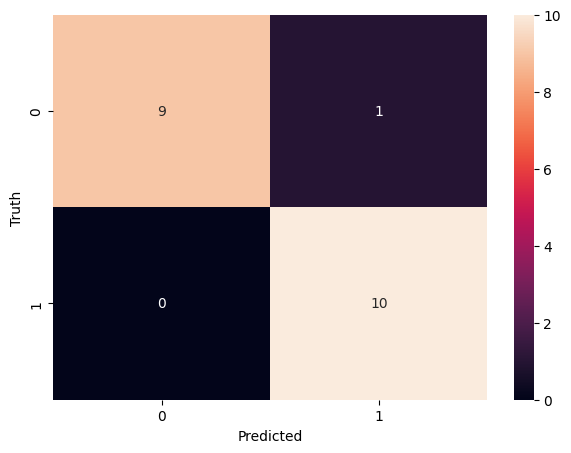

In [70]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")